# About the data.
There are various features in the data regarding the candidate everything from the class 10th till the MBA. To predict if the candidate will get placed or not.

1. sl_no : Serial Number.
2. gender : Sex of the candidate.
3. ssc_p : Class 10th percentage.
4. ssc_b : Class 10th board of education.
5. hsc_p : Class 12th percentage.
6. hsc_b : Class 12th board of education.
7. hsc_s : Field of study in Class 12th.
8. degree_p : Degree percentage.
9. degree_t : Undergrad field of education.
10. workex : Years of work experience.
11. etest_p : Employability test percentage.
12. specialisation : Field of study during Post Graduation.
13. mba_p : MBA percentage.
14. status : placed/not placed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Lets get a sense of the numerical features

In [3]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.shape

(215, 15)

### Problem is to predict if the candidate will get placed or not.

In [6]:
data.drop('salary', axis=1, inplace=True)

# Data Analysis.

## Pairplot.
Source to learn about pairplot: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

Text(0.5, 1.0, 'Distribution of the features')

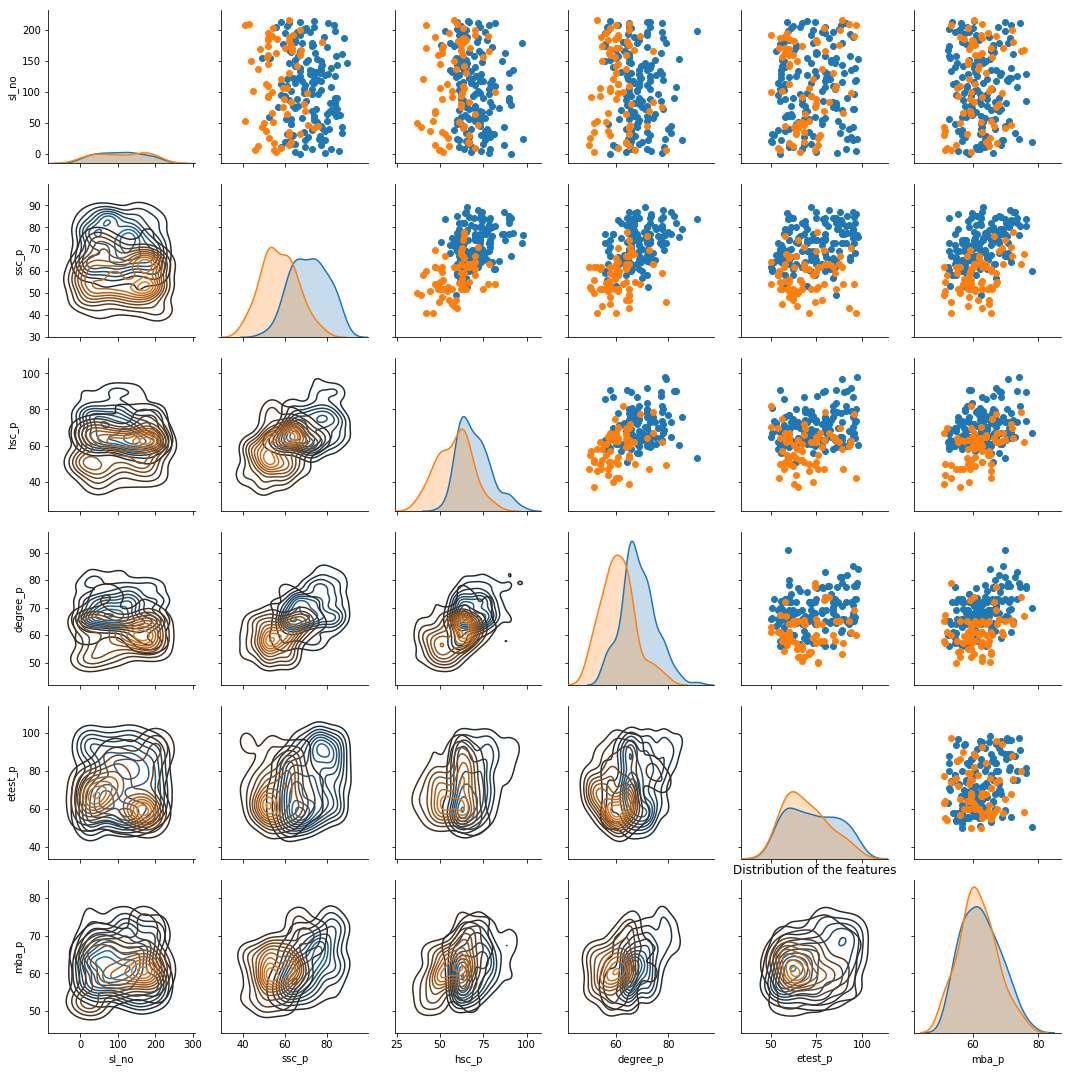

In [7]:
grid = sns.PairGrid(data= data, hue='status')
grid = grid.map_upper(plt.scatter)
grid = grid.map_diag(sns.kdeplot, shade=True)
grid = grid.map_lower(sns.kdeplot)
plt.title('Distribution of the features')

## Observation.
1. All the numerical features are almost symmetrically distributed with respect to the mean.
2. Placed candidates have higher class 10, class 12, and degree percentages.

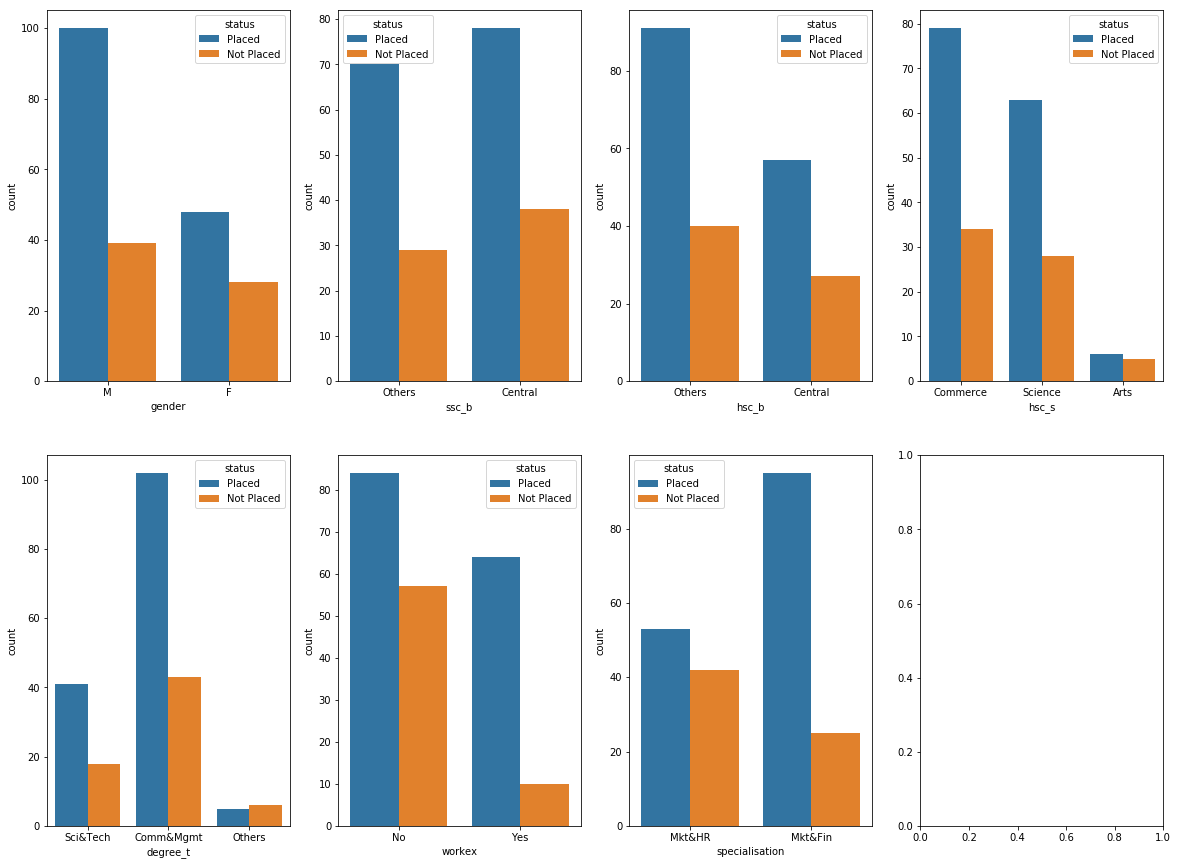

In [8]:
cat_feats = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

fig, axes = plt.subplots(2, 4, figsize=(20, 15))

sns.countplot(data.gender, hue=data.status, ax=axes[0][0])
sns.countplot(data.ssc_b, hue=data.status, ax=axes[0][1])
sns.countplot(data.hsc_b, hue=data.status, ax=axes[0][2])
sns.countplot(data.hsc_s, hue=data.status, ax=axes[0][3])
sns.countplot(data.degree_t, hue=data.status, ax=axes[1][0])
sns.countplot(data.workex, hue=data.status, ax=axes[1][1])
sns.countplot(data.specialisation, hue=data.status, ax=axes[1][2])

## Conclusions from the above plots.

1. Males have performed a lot better during the interview process than females.
2. The board of study of class 10 and 12 actually donot matter.
3. A company will need people who have good amount of knoweledge with respect to how to manage a company, manage the financial part of the company, etc. Another set of people who can work on the technology part. Hence Management and Technology become the two major parts on which the company relies on. We see that these two fields have better job opportunities than the rest of them.
4. Definitely a person who has prior experience will have better chance of getting placed.
5. Most frequently asked question, HR of Finance in MBA? Looking at the plot above its clear that Finance has better opportunities than HR. But HR is definitely a position where you earn a lot of respect.

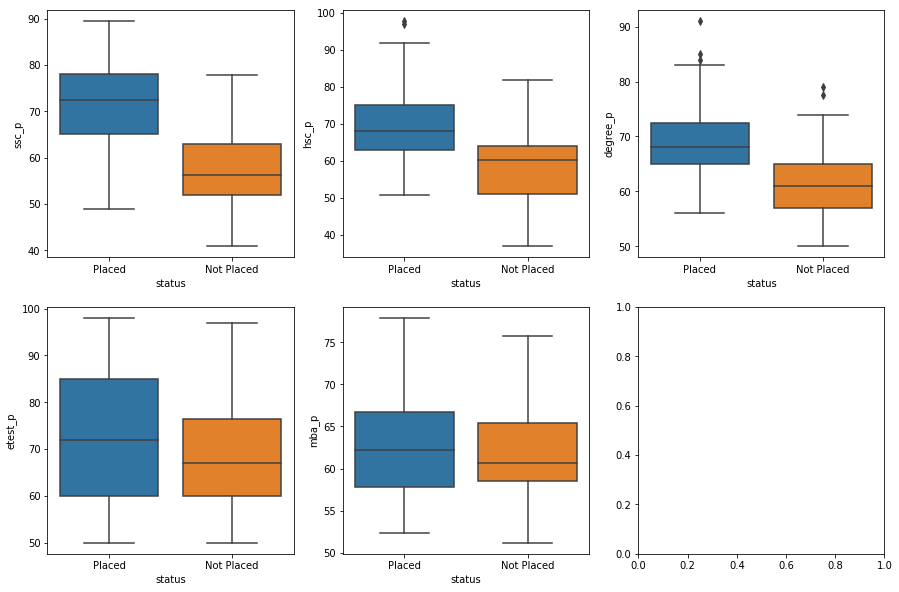

In [9]:
num_feats = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

fig1, axes1 = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(data.status, data.ssc_p, ax=axes1[0][0])
sns.boxplot(data.status, data.hsc_p, ax=axes1[0][1])
sns.boxplot(data.status, data.degree_p, ax=axes1[0][2])
sns.boxplot(data.status, data.etest_p, ax=axes1[1][0])
sns.boxplot(data.status, data.mba_p, ax=axes1[1][1])

## Conclusions.
1. There is signigicant difference between the distribution of the ssc_p, hsc_p, and degree_p of placed and not placed candidates. Done this mean marks matter? Not exactly, as the dataset is very small and yeah its true for this set of examples.
2. Whereas etest_p and mba_p should have mattered more than the anything else. But that does not seem to be true here.

#### Hence conclusion, marks matters but will never be the deciding factor. What matters is the knoweledge one has gained and the field in which he is working on.

# Exploring Categories.

Handling categorical features seems to be the most important part of analysis and preprocessing.

In [10]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

In [11]:
data.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [12]:
data.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [13]:
data.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [14]:
data.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [15]:
data.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

Less candidates have got work experience. Hence having a work experience will give and edge over other candidates.

In [16]:
data.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

## Encoding Categorical Features.

In [17]:
encoder = LabelEncoder()

data['gender'] = encoder.fit_transform(data['gender'])
data['ssc_b'] = encoder.fit_transform(data['ssc_b'])
data['hsc_b'] = encoder.fit_transform(data['hsc_b'])
data['hsc_s'] = encoder.fit_transform(data['hsc_s'])
data['degree_t'] = encoder.fit_transform(data['degree_t'])
data['workex'] = encoder.fit_transform(data['workex'])
data['specialisation'] = encoder.fit_transform(data['specialisation'])

data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,Placed
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,Placed
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,Placed
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,Not Placed
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,Placed


In [18]:
#encode target labels.
def encode(col):
    if col[0] == 'Placed':
        return 1
    else:
        return 0
    
data['status'] = data[['status']].apply(encode, axis=1)

# Train Test Split.

In [19]:
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data.status)

print('train size : ' + str(train_data.shape[0]))
print('test size : ' + str(test_data.shape[0]))

train size : 172
test size : 43


# Data Imbalance.

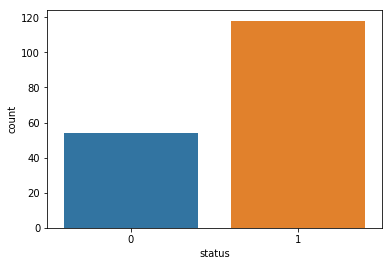

In [20]:
sns.countplot(train_data.status)

In [21]:
train_data.status.value_counts()

1    118
0     54
Name: status, dtype: int64

### Just 31% of the dataset constitutes the negative (not placed) samples. This makes the dataset slightly imbalanced.

As the size of the train data is vary small, downsampling would reduce the size of the dataset further. Hence I guess upsampling technique would work better here.

## Data Imbalance Handling Techniques Resources.

1. Basic Techniques: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
2. Geometric Smote: https://towardsdatascience.com/handling-imbalanced-data-using-geometric-smote-770b49d5c7b5
3. ADASYN: https://towardsdatascience.com/adasyn-adaptive-synthetic-sampling-method-for-imbalanced-data-602a3673ba16

In [22]:
test_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
79,80,0,69.00,0,62.0,0,2,66.0,2,0,75.00,1,67.99,0
80,81,0,69.00,1,62.0,1,1,69.0,0,1,67.00,1,62.35,1
123,124,1,74.00,1,59.0,1,1,73.0,0,1,60.00,1,56.70,1
113,114,0,73.96,1,79.0,1,1,67.0,0,0,72.15,0,63.08,1
212,213,1,67.00,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1


In [23]:
train_labels = pd.DataFrame(train_data.status, columns=['status'])
train_data.drop('status', axis=1, inplace=True)

test_labels = pd.DataFrame(test_data.status, columns=['status'])
test_data.drop('status', axis=1, inplace=True)

sampler = TomekLinks()
train_res, labels_res = sampler.fit_resample(train_data, train_labels)

In [29]:
train_res = pd.DataFrame(train_res, columns=train_data.columns)
labels_res = pd.DataFrame(labels_res, columns=['status'])

In [30]:
labels_res.status.value_counts()

1    109
0     54
Name: status, dtype: int64

### After sampling.
1. Size of class 1 : 109
2. Size of class 0 : 54

9 examples from the majority class were dropped off.

# Correlation and Feature Importance.

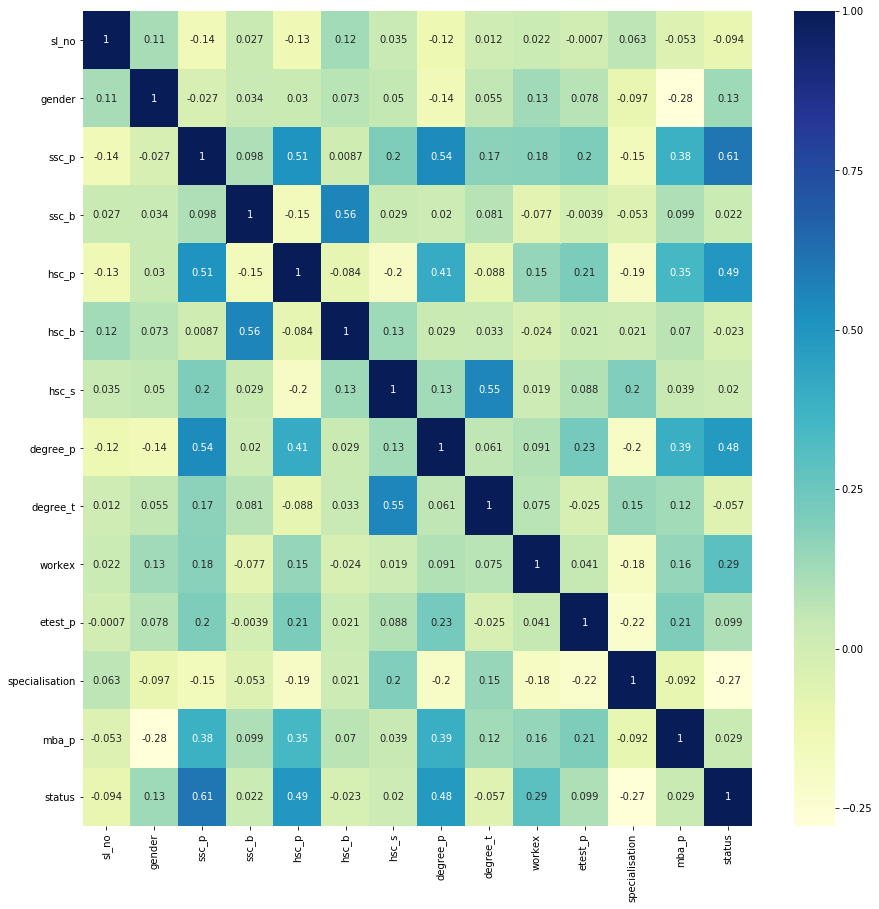

In [31]:
corr = pd.concat([train_res, labels_res], axis=1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

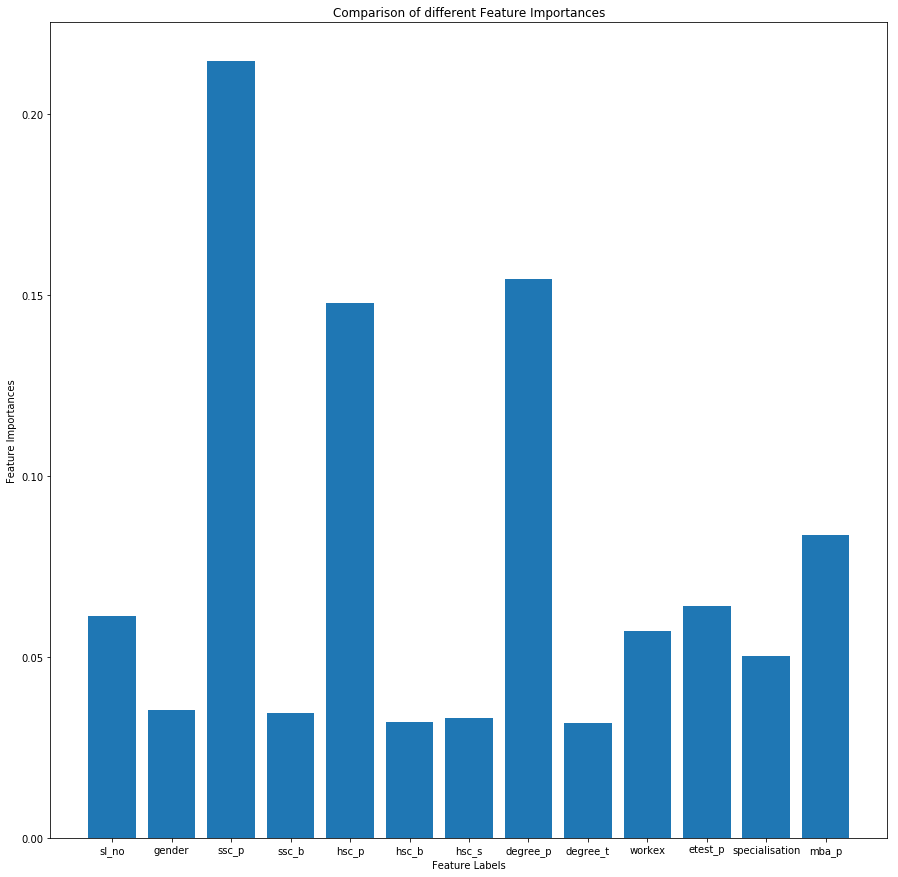

In [32]:
extra_tree_forest = ExtraTreesClassifier() 
  
extra_tree_forest.fit(train_res, labels_res) 

feature_importance = extra_tree_forest.feature_importances_ 

plt.figure(figsize=(15, 15))
plt.bar(train_res.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

## What can we infer from this?
1. Features representing the percentage seem to have very high importance ni this problem.
2. ssc_p (Class 10 percentage) is the most important feature.
3. Board of education have very less importance as seen before.
4. ssc_p, hsc_p, and degree_p are high positive correlation with each other. This says that most of the candidates were consistent in their performance from class 10 till the post graduation. Some candidates might have improved or deproved their performance.
5. Usually serial number of the candidate does not have influence over if the candidate has to be selected or not. But the model could find some pattern in that feature. This might help the model accuracy.

Lets train now!!

# Model Training Without Tuning.

In [33]:
def print_metrics(predicts, true_labels):
    print('Accuracy : ' + str(round(accuracy_score(predicts, true_labels), 2)))
    print('Precision : ' + str(round(precision_score(predicts, true_labels), 2)))
    print('Recall : ' + str(round(recall_score(predicts, true_labels), 2)))
    print('f1score : ' + str(round(f1_score(predicts, true_labels), 2)))

In [35]:
test_data.reset_index(inplace=True, drop=True)
test_labels.reset_index(inplace=True, drop=True)

train_res.reset_index(inplace=True, drop=True)
labels_res.reset_index(inplace=True, drop=True)

# train_res.drop('index', axis=1, inplace=True)
# labels_res.drop('index', axis=1, inplace=True)
# test_data.drop('index', axis=1, inplace=True)
# test_labels.drop('index', axis=1, inplace=True)

In [36]:
def scale_data(train, test, num_cols):
    scaler = MinMaxScaler(feature_range=(0, 3))

    temp_data = train.copy()
    temp_test = test.copy()

    scaled_data = pd.DataFrame(scaler.fit_transform(temp_data[num_cols]), columns = num_cols)
    temp_data.drop(num_cols, axis=1, inplace=True)
    final_data = pd.concat([temp_data, scaled_data], axis=1)

    scaled_test = pd.DataFrame(scaler.fit_transform(temp_test[num_cols]), columns = num_cols)
    temp_test.drop(num_cols, axis=1, inplace=True)
    final_test = pd.concat([temp_test, scaled_test], axis=1)
    
    return final_data, final_test

## Logistic Regression

In [40]:
logistic = LogisticRegression()
log_data, log_test = scale_data(train_res, test_data, num_feats + ['sl_no'])
logistic.fit(log_data, labels_res)
preds = logistic.predict(log_test)
print_metrics(preds, test_labels)

log_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.79
Precision : 0.8
Recall : 0.89
f1score : 0.84


## Decision Tree

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(train_res, labels_res)
preds = dtc.predict(test_data)
print_metrics(preds, test_labels)

dtc_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.84
Precision : 0.83
Recall : 0.93
f1score : 0.88


## Random Forest

In [39]:
rfc = RandomForestClassifier()
rfc.fit(train_res, labels_res)
preds = rfc.predict(test_data)
print_metrics(preds, test_labels)

rfc_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.86
Precision : 0.87
Recall : 0.93
f1score : 0.9


## Confusion Matrix

Text(0.5, 1.0, 'Random Forest')

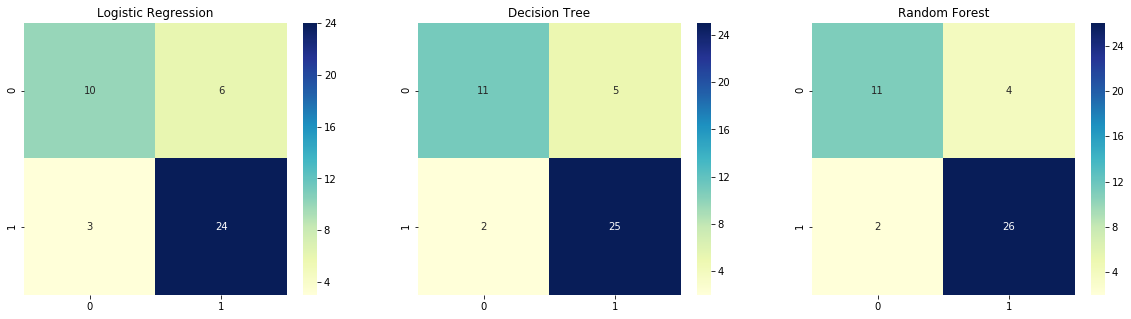

In [41]:
fig, axes2 = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(log_matrix, cmap='YlGnBu', annot=True, ax=axes2[0])
sns.heatmap(dtc_matrix, cmap='YlGnBu', annot=True, ax=axes2[1])
sns.heatmap(rfc_matrix, cmap='YlGnBu', annot=True, ax=axes2[2])

axes2[0].set_title("Logistic Regression")
axes2[1].set_title("Decision Tree")
axes2[2].set_title("Random Forest")

# Model Training with Parameter Tuning.

## Logistic Regression

In [64]:
logistic_tune = LogisticRegression()
log_data, log_test = scale_data(train_res, test_data, num_feats + ['sl_no'])

params = {
    'penalty' : ['l1', 'l2'],
    'max_iter' : [80, 90, 100, 110, 120]
}

search = RandomizedSearchCV(logistic_tune, params, n_iter=20, cv=6, random_state=21)

best_model = search.fit(log_data, labels_res)
best_logistic = LogisticRegression(**best_model.best_estimator_.get_params())
best_logistic.fit(log_data, labels_res)
preds = best_logistic.predict(log_test)
print_metrics(preds, test_labels)

log_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.79
Precision : 0.8
Recall : 0.89
f1score : 0.84


## Decision Tree

In [58]:
dtc_tune = DecisionTreeClassifier()

params = {
    'max_depth' : [8, 9],
    'max_features' : [9, 10]    
}

search = RandomizedSearchCV(dtc_tune, params, n_iter=50, cv=8, random_state=21)

best_model = search.fit(train_res, labels_res)
best_dtc = DecisionTreeClassifier(**best_model.best_estimator_.get_params())
best_dtc.fit(train_res, labels_res)
preds = best_dtc.predict(test_data)
print_metrics(preds, test_labels)

dtc_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.86
Precision : 0.87
Recall : 0.93
f1score : 0.9


## Random Forest

In [44]:
rfc_tune = RandomForestClassifier()

params = {
    'n_estimators' : [160, 170, 180],
    'max_depth' : [6, 7, 8],
    'max_features' : [5, 6, 7],
    'bootstrap' : [True],
    'min_samples_leaf' : [2, 3]    
}

search = RandomizedSearchCV(rfc_tune, params, n_iter=40, cv=8, random_state=21)

best_model = search.fit(train_res, labels_res)
best_rfc = RandomForestClassifier(**best_model.best_estimator_.get_params())
best_rfc.fit(train_res, labels_res)
preds = best_rfc.predict(test_data)
print_metrics(preds, test_labels)

rfc_matrix = confusion_matrix(preds, test_labels)

Accuracy : 0.86
Precision : 0.9
Recall : 0.9
f1score : 0.9


## Confusion Matrix

Text(0.5, 1.0, 'Random Forest Tuned')

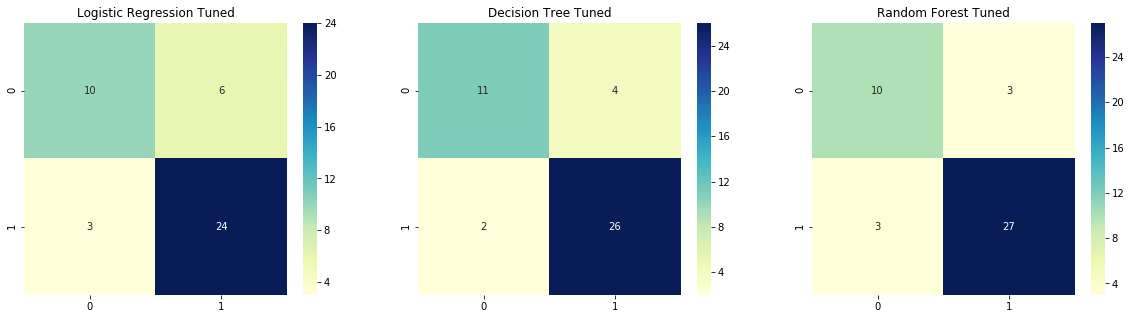

In [65]:
fig, axes3 = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(log_matrix, cmap='YlGnBu', annot=True, ax=axes3[0])
sns.heatmap(dtc_matrix, cmap='YlGnBu', annot=True, ax=axes3[1])
sns.heatmap(rfc_matrix, cmap='YlGnBu', annot=True, ax=axes3[2])

axes3[0].set_title("Logistic Regression Tuned")
axes3[1].set_title("Decision Tree Tuned")
axes3[2].set_title("Random Forest Tuned")

# Summary

The dataset size was 215. Split the dataset into 80% train and 20% test set. After analysis the dataset was trained on three different models and tested on the same. The test accuracies were as shown below.

### Logistic Regression
1. Without tuning : 79%
2. With tuning : 79%

### Decision Tree
1. Without tuning : 84%
2. With tuning : 86%

### Random Forest
1. Without tuning : 86%
2. With tuning : 86%

Logistic Regression and Random Forest showed no improvment after tuning them as they were already in their best with default parameter values. But could see slight improvement in the Decision Tree Accuracy.